# Exploratory Data Analysis

Guiding Questions:
* What customer purchasing patterns can you discover? Such as activity on different days of the week, or weekly, monthly, quarterly, yearly, etc.
* Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?
* Which States and which customers made the highest number of orders? Are they the same as the highest spenders?
* Can you make a map showing the 5 States generating the most and least sales revenue?
* Can we see any patterns in the quarterly revenue behavior?
* Can you create a plot showing the growth rate of new customers over the months?
* What do you think about the customers? Are they individuals or wholesalers? Why would you say so?
* Are there any issues with the dataset?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Some insights

How is it going currently? 
* Sales increase in 2017
* Customer Segment
  * sales increase across all segments
  * sales ranking: Consumer, Corporate, Home Office 
  * profit ranking similar; recently there has been a drop in profits in the Corporate segment 
  * the distribution approximately stays constant
* Regions, States
  * Sales highest in California, New York, Texas; similar to population
  * Profits however can be negative! Texas, Florida 

How is the regional sales going? 
* What the fuck happened in Texas?
  * Greedy customers buy stuff when on discount!
  * Try a different discount approach: 
    * don't easily give the discounts away; discounts should not be gameable; is that the case? Do people just come when discounts are available? 
    * less discounts, such that there is still a profit margin
  * can customers be segmented into Discount buyers and repeated buyers?

In [2]:
%store -r dashboard_data

In [3]:
dashboard_data.head()

,OrderDate,ProductID,CustomerID,ShipmentID,OrderReference,Quantity,Discount,Sales,Profit,DiscountAmount,...,ProductName,Category,SubCategory,ShipDate,ShipMode,PostalCode,City,Country,Region,State
0,2014-09-07 00:00:00,TEC-PH-10000000,DK-13375,0,CA-2014-100006,3,0.0,377.970,109.6113,0.000,...,AT&T EL51110 DECT,Technology,Phones,2014-09-13 00:00:00,Standard Class,10024,New York City,United States,East,New York
1,2014-10-19 00:00:00,TEC-PH-10000001,EH-14125,10,CA-2014-100867,6,0.2,321.552,20.0970,80.388,...,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-10-24 00:00:00,Standard Class,90712,Lakewood,United States,West,California
2,2014-11-21 00:00:00,TEC-PH-10000001,JK-15325,4328,US-2014-168501,5,0.2,267.960,16.7475,66.990,...,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-11-27 00:00:00,Standard Class,75220,Dallas,United States,Central,Texas
3,2015-06-16 00:00:00,TEC-PH-10000001,LC-16885,4459,US-2015-163825,2,0.0,133.980,33.4950,0.000,...,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2015-06-19 00:00:00,First Class,10009,New York City,United States,East,New York
4,2017-01-20 00:00:00,TEC-PH-10000001,TH-21100,4011,CA-2017-161809,3,0.2,160.776,10.0485,40.194,...,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2017-01-26 00:00:00,Standard Class,90045,Los Angeles,United States,West,California


In [4]:
dashboard_data.columns

Index(['OrderDate', 'ProductID', 'CustomerID', 'ShipmentID', 'OrderReference',
       'Quantity', 'Discount', 'Sales', 'Profit', 'DiscountAmount',
       'SalesWoDiscount', 'CustomerName', 'Segment', 'ProductName', 'Category',
       'SubCategory', 'ShipDate', 'ShipMode', 'PostalCode', 'City', 'Country',
       'Region', 'State'],
      dtype='object')

In [11]:
dashboard_data.OrderDate = pd.to_datetime(dashboard_data.OrderDate)

In [8]:
dashboard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderDate        9986 non-null   object 
 1   ProductID        9986 non-null   object 
 2   CustomerID       9986 non-null   object 
 3   ShipmentID       9986 non-null   int64  
 4   OrderReference   9986 non-null   object 
 5   Quantity         9986 non-null   int64  
 6   Discount         9986 non-null   float64
 7   Sales            9986 non-null   float64
 8   Profit           9986 non-null   float64
 9   DiscountAmount   9986 non-null   float64
 10  SalesWoDiscount  9986 non-null   float64
 11  CustomerName     9986 non-null   object 
 12  Segment          9986 non-null   object 
 13  ProductName      9986 non-null   object 
 14  Category         9986 non-null   object 
 15  SubCategory      9986 non-null   object 
 16  ShipDate         9986 non-null   object 
 17  ShipMode      

# General company infos

In [14]:
total_revenue = dashboard_data.groupby(dashboard_data.OrderDate.dt.year).Sales.sum()
total_revenue

OrderDate
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [16]:
orders = dashboard_data.groupby(dashboard_data.OrderDate.dt.year).OrderReference.count()
orders

OrderDate
2014    1992
2015    2101
2016    2583
2017    3310
Name: OrderReference, dtype: int64

In [48]:
total_revenue_wo_discount = dashboard_data.SalesWoDiscount.sum()
print(total_revenue_wo_discount)

2863935.04


In [47]:
total_profit = dashboard_data.Profit.sum()
print(total_profit)

286397.0217


In [70]:
dashboard_data[['Category', 'SubCategory']].drop_duplicates().sort_values(by='Category')

,Category,SubCategory
889,Furniture,Tables
4315,Furniture,Chairs
6754,Furniture,Furnishings
9500,Furniture,Bookcases
1208,Office Supplies,Binders
2730,Office Supplies,Paper
4098,Office Supplies,Fasteners
4931,Office Supplies,Art
5727,Office Supplies,Envelopes
9728,Office Supplies,Supplies


# Discounts
* discount hunters
* customers with negative profit

In [34]:
# How many discount hunters are there?
customers_only_buy_on_discount = dashboard_data.groupby('CustomerID').apply(lambda g: (g.Discount>0).all()).rename('orders_only_with_discount')
print('fraction of discount hunters of all customers', customers_only_buy_on_discount.sum() / customers_only_buy_on_discount.shape[0])

fraction of discount hunters of all customers 0.04287515762925599


C:\Users\olive\AppData\Local\Temp\ipykernel_26348\1066716713.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customers_only_buy_on_discount = dashboard_data.groupby('CustomerID').apply(lambda g: (g.Discount>0).all()).rename('orders_only_with_discount')


In [50]:
# How much profit is lost to discount hunters?
discount_hunters = customers_only_buy_on_discount[customers_only_buy_on_discount==True]
is_order_by_dh = dashboard_data.CustomerID.isin(discount_hunters.index)
(dashboard_data.loc[is_order_by_dh, 'SalesWoDiscount'].sum() - dashboard_data.loc[is_order_by_dh, 'Sales'].sum()) / total_profit

np.float64(0.046736205986181216)

They make only a small fraction of the total revenue. This quantity is tilted, because their sales is reduced by the discount.

In [52]:
# How many orders do customers with negative net profit place?
# How much of the sales do they generate?
customers_sales_profit = dashboard_data[['CustomerID', 'Sales', 'Profit']].groupby(by='CustomerID').sum().reset_index()
mask_customers_with_neg_profit = customers_sales_profit.Profit<=0
customers_sales_profit.loc[mask_customers_with_neg_profit, 'Sales'].sum() / total_revenue
# customers_sales_profit

np.float64(0.17062086884679892)

In [55]:
# where do customers with neg profit order to?
customers_neg_profit = customers_sales_profit[mask_customers_with_neg_profit].CustomerID
fraction_neg_profits_per_state = dashboard_data.loc[dashboard_data.CustomerID.isin(customers_neg_profit), 'State'].value_counts() / dashboard_data.State.value_counts()
fraction_neg_profits_per_state.sort_values()

State
Utah                    0.018868
Louisiana               0.023810
Missouri                0.030303
Iowa                    0.033333
Idaho                   0.047619
Nevada                  0.051282
Delaware                0.052083
Rhode Island            0.053571
Wisconsin               0.054545
Georgia                 0.059783
New Hampshire           0.074074
Minnesota               0.078652
New Mexico              0.081081
Washington              0.090909
Arkansas                0.100000
Massachusetts           0.111111
Virginia                0.116592
South Carolina          0.119048
New Jersey              0.123077
Indiana                 0.127517
Connecticut             0.134146
California              0.135432
Oklahoma                0.136364
New York                0.142857
Alabama                 0.147541
South Dakota            0.166667
Kentucky                0.166667
Michigan                0.172549
Tennessee               0.218579
Arizona                 0.223214
Texa

<Axes: xlabel='OrderValue', ylabel='DiscountAmount'>

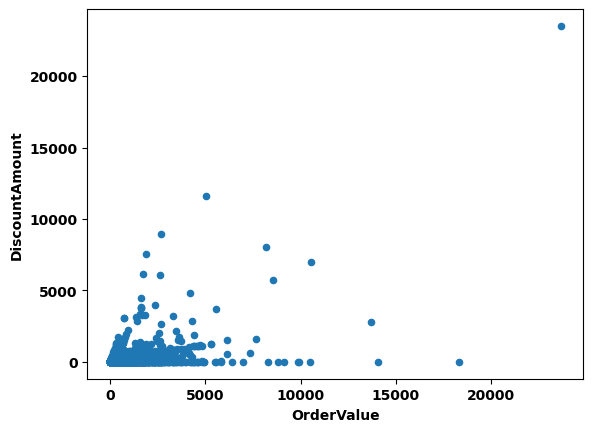

In [68]:
# discount amount vs. order value
discount_ordervalue = dashboard_data[['OrderReference', 'Sales', 'DiscountAmount']].groupby('OrderReference').sum()
discount_ordervalue = discount_ordervalue.rename(columns={'Sales':'OrderValue'})
discount_ordervalue.plot.scatter(x='OrderValue', y='DiscountAmount')

# Shipments
* Do shipments arrive late? 